# 1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [3]:
import pandas as pd
titanic =  pd.read_csv("./titanic.csv", sep=';')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
titanic.dropna(axis='index', inplace=True)
titanic.drop(axis='columns',columns='Cabin', inplace=True)
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [5]:
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)

In [6]:
titanic.loc[:,"Fare_recode"] = pd.cut(titanic.Fare,retbins=True,bins = (-0.001,25,50,75,100,513))[0]
pd.cut(titanic.Fare,retbins=True,bins = (-0.001,25,50,75,100,513))[0]

1      (-0.001, 25.0]
4        (50.0, 75.0]
16     (100.0, 513.0]
19      (75.0, 100.0]
26      (75.0, 100.0]
            ...      
862      (25.0, 50.0]
863      (25.0, 50.0]
865    (100.0, 513.0]
875      (25.0, 50.0]
881    (100.0, 513.0]
Name: Fare, Length: 183, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 25.0] < (25.0, 50.0] < (50.0, 75.0] < (75.0, 100.0] < (100.0, 513.0]]

In [7]:
#convertion de la variable "survie" et "Sex" en variable numeric"
titanic["Survived"]=titanic["Survived"].map({"Yes": 1, "No": 0})
titanic["Sex"]=titanic["Sex"].map({"male": 1, "female": 0})
titanic["Embarked"]=titanic["Embarked"].map({"S": 1,"C": 2,"Q": 3})

titanic["Fare_recode"].value_counts()

(25.0, 50.0]      48
(100.0, 513.0]    41
(75.0, 100.0]     37
(50.0, 75.0]      34
(-0.001, 25.0]    23
Name: Fare_recode, dtype: int64

In [8]:
#Modèl importation#
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [9]:
titanic["Fare_recode"] = titanic["Fare_recode"].cat.rename_categories([1, 2, 3,4,5])
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_recode
1,0,3,1,25.0,0,0,7.65,1,1
4,0,1,1,31.0,1,0,52.00,1,3
16,0,1,1,27.0,0,2,211.50,2,5
19,1,1,1,38.0,1,0,90.00,1,4
26,1,1,1,60.0,1,1,79.20,2,4
33,0,1,1,45.0,0,0,26.55,1,2
37,1,1,1,28.0,0,0,26.55,1,2
59,0,1,1,30.0,0,0,27.75,2,2
60,1,1,0,22.0,1,0,66.60,1,3
63,1,2,0,27.0,0,0,10.50,1,1


In [10]:
x = titanic[['Pclass', 'Sex','Age','SibSp', 'Parch','Embarked','Fare_recode']]
y = titanic['Survived']

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%

In [53]:
DT_model = tree.DecisionTreeClassifier(max_depth=4)
DT_model= DT_model.fit(x_train, y_train.ravel())#Training our model
DT_pred = DT_model.predict(x_test)#testing our model

In [39]:
#Random Forest Prediction
#from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
#clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees

In [19]:
#clf.fit(x_train, y_train)  #Training our model
#y_pred=clf.predict(x_test)  #testing our model

In [54]:
print("Accuracy:", metrics.accuracy_score(y_test, DT_pred))  #Measuring the accuracy of our model

Accuracy: 0.7454545454545455


# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [24]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\KASS\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.4                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
Note: you may need to restart the kernel to use updated packages.

    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b1

In [26]:
from sklearn import tree

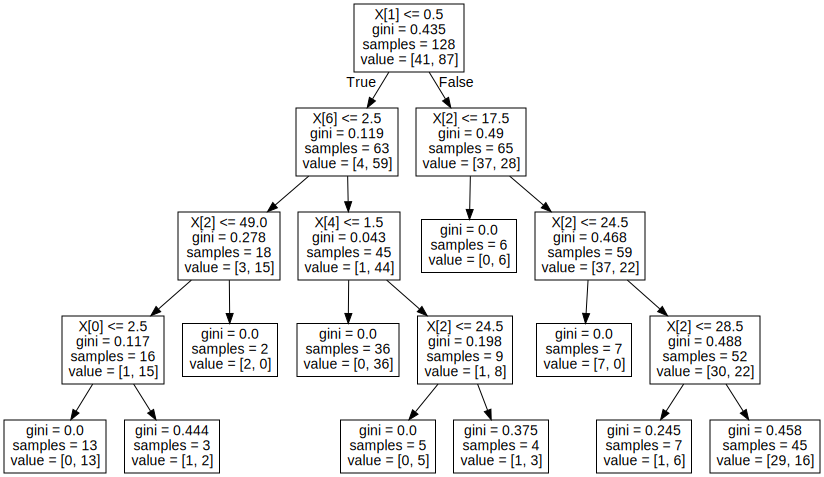

In [37]:
import graphviz
dot_data=tree.export_graphviz(DT_model,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("titanic")
graph

# 3. Change the decision tree parameters(at least two parameters)

In [51]:
DT_model = tree.DecisionTreeClassifier(max_depth=20)
DT_model= DT_model.fit(x_train, y_train.ravel())#Training our model
DT_pred = DT_model.predict(x_test)#testing our model

In [52]:
print("Accuracy:", metrics.accuracy_score(y_test, DT_pred))  #Measuring the accuracy of our model

Accuracy: 0.7636363636363637


la nouvelle precision est plus importante que la première

# 5. Use a random forest then change the number of estimators.

In [56]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model

In [57]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7090909090909091


In [58]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model

In [59]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7454545454545455
